In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

notebook_path = os.path.abspath("main.ipynb")
file_name=notebook_path.split('Code')[0]
data_path = os.path.join(file_name, "data\\bank\\bank-full.csv")

dataset1 = pd.read_csv(data_path, sep = ';')

In [4]:
# View the first 5 rows in the dataset
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Count total NaN at each column in a DataFrame --> There is no missing value in data set.
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      dataset1.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [4]:
uniqueValues = dataset1.nunique()
print(uniqueValues)

uniqueValues = dataset1['y'].unique()
print('Unique elements in column "y" ')
print(uniqueValues)

uniqueValues = dataset1['poutcome'].unique()
print('Unique elements in column "Poutcome" ')
print(uniqueValues)

uniqueValues = dataset1['campaign'].unique()
print('Unique elements in column "campaign" ')
print(uniqueValues)

uniqueValues = dataset1['contact'].unique()
print('Unique elements in column "contact" ')
print(uniqueValues)

uniqueValues = dataset1['loan'].unique()
print('Unique elements in column "loan" ')
print(uniqueValues)

uniqueValues = dataset1['housing'].unique()
print('Unique elements in column "housing" ')
print(uniqueValues)

uniqueValues = dataset1['education'].unique()
print('Unique elements in column "education" ')
print(uniqueValues)

uniqueValues = dataset1['marital'].unique()
print('Unique elements in column "marital" ')
print(uniqueValues)

uniqueValues = dataset1['job'].unique()
print('Unique elements in column "job" ')
print(uniqueValues)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64
Unique elements in column "y" 
['no' 'yes']
Unique elements in column "Poutcome" 
['unknown' 'failure' 'other' 'success']
Unique elements in column "campaign" 
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Unique elements in column "contact" 
['unknown' 'cellular' 'telephone']
Unique elements in column "loan" 
['no' 'yes']
Unique elements in column "housing" 
['yes' 'no']
Unique elements in column "education" 
['tertiary' 'secondary' 'unknown' 'primary']
Unique elements in column "marital" 
['married' 'single' 'divorced']
Unique elements in column "job" 
['management' 'tech

In [7]:
dataset1.groupby(['y']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [5]:
numpyArray = np.array([[dataset1['age'].max() , dataset1['age'].min(), np.NaN,  dataset1['age'].median()
                        , dataset1['age'].std(),dataset1['age'].mean(), dataset1['age'].count()],
                       [dataset1['balance'].max(), dataset1['balance'].min(), dataset1['balance'].sum()
                        , dataset1['balance'].median(), dataset1['balance'].std(), dataset1['balance'].mean(), dataset1['balance'].count()],
                       [dataset1['duration'].max(), dataset1['duration'].min(), np.NaN
                        , dataset1['duration'].median(), dataset1['duration'].std(), dataset1['duration'].mean(), dataset1['duration'].count()]
                      ]) 
panda_df = pd.DataFrame(data = numpyArray,  
                        index = ["age", "balance", "duration"],  
                        columns = ["max", "min", "sum", "median", "std", "mean", "count"]) 

panda_df

,max,min,sum,median,std,mean,count
age,95.0,18.0,NaN,39.0,10.618762,40.936210,45211.0
balance,102127.0,-8019.0,61589682.0,448.0,3044.765829,1362.272058,45211.0
duration,4918.0,0.0,NaN,180.0,257.527812,258.163080,45211.0


In [6]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = dataset1.poutcome == 'other'
dataset2 = dataset1.drop(dataset1[condition].index, axis = 0, inplace = False)

In [7]:
# Step 2: Replace 'unknown' in job and education with 'other'
dataset2[['job','education']] = dataset2[['job','education']].replace(['unknown'],'other')

In [8]:
from scipy.stats import zscore

dataset2[['balance']].mean()
dataset2[['balance']].mean()

dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])

condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)

In [9]:
dataset4 = dataset3.drop('balance_outliers', axis=1)

In [10]:
# Step 1: Change column name: 'y' to 'response'
dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()

convert(dataset4, "response_binary", "response")

0    37785
1     4870
Name: response_binary, dtype: int64

In [11]:
# Step 2: Drop column "contact" which is useless
dataset5 = dataset4.drop('contact', axis=1)

In [12]:
# Step 3: Change the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)

In [13]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [dataset5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [14]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)

In [15]:
# Step 2: Drop customer values with 'other' education
condition3 = (dataset5['education'] == 'other')
dataset7 = dataset5.drop(dataset6[condition3].index, axis = 0, inplace = False)

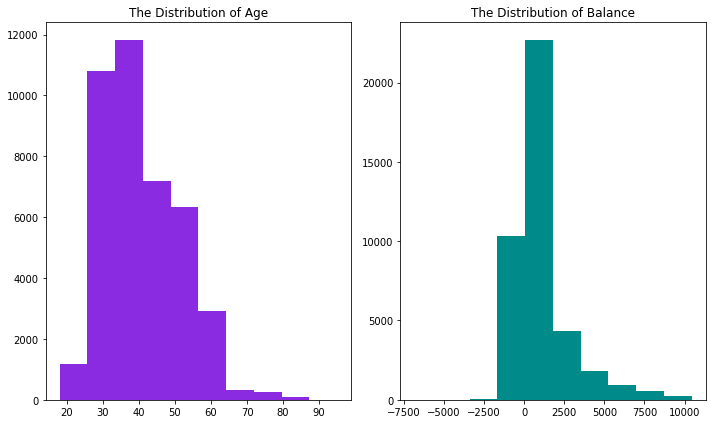

In [16]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7['age'], color = 'blueviolet')
ra1.set_title('The Distribution of Age')

ra2.hist(dataset7['balance'], color = 'darkcyan')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

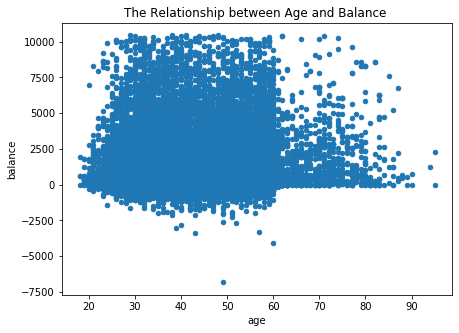

In [17]:
scatter_age_balance = dataset7.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

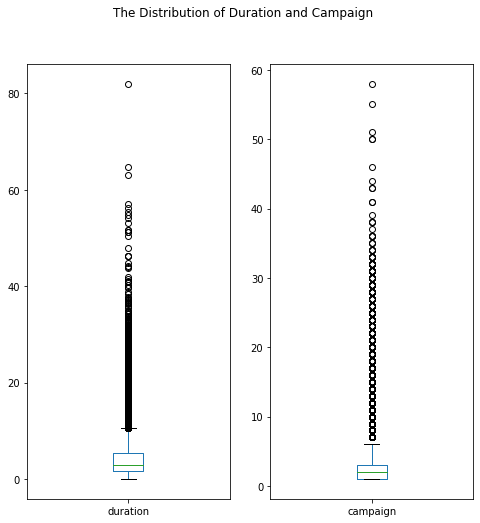

In [18]:
dist_dur_cam = dataset7[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

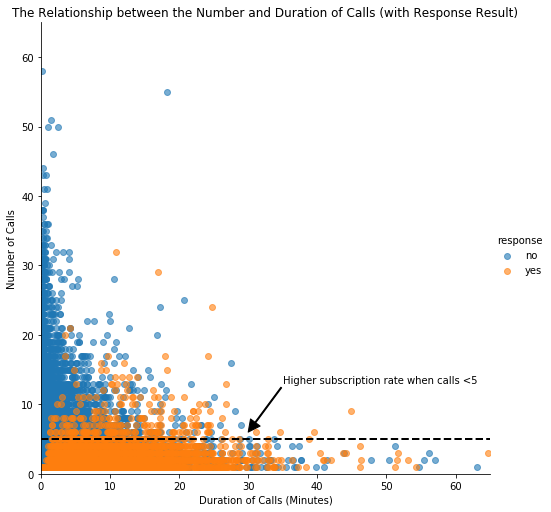

In [19]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

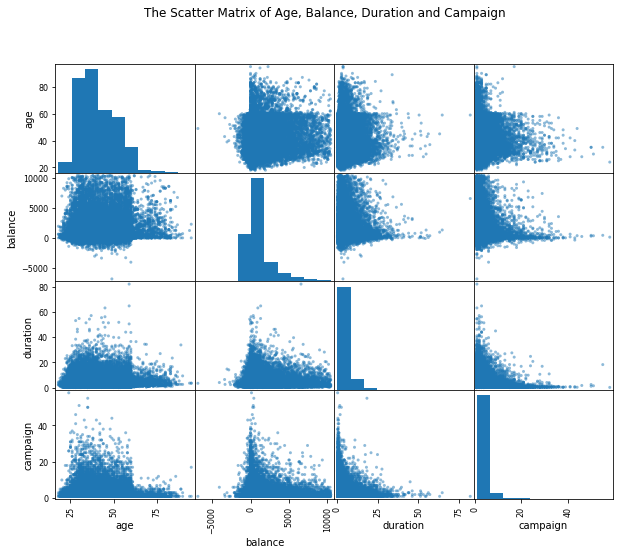

In [20]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset7[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

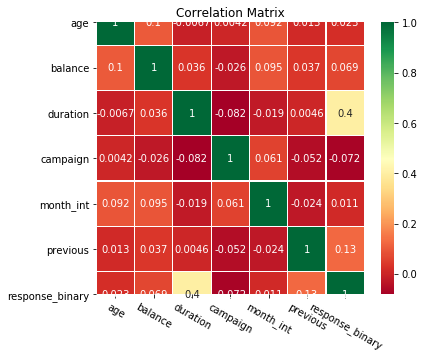

In [21]:
corr_data = dataset7[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [22]:
lst = [dataset7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [23]:
count_age_response_pct = pd.crosstab(dataset7['response'],dataset7['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [24]:
age = pd.DataFrame(dataset7['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

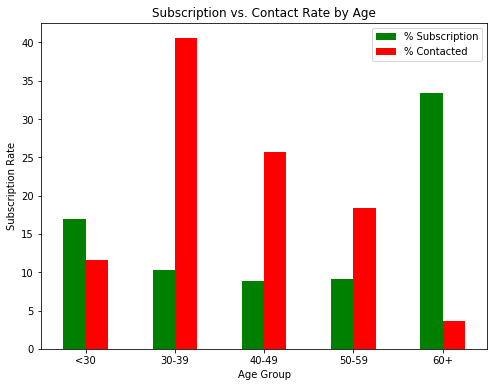

In [25]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [26]:
lst = [dataset7]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [27]:
count_balance_response_pct = pd.crosstab(dataset7['response'],dataset7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [28]:
bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

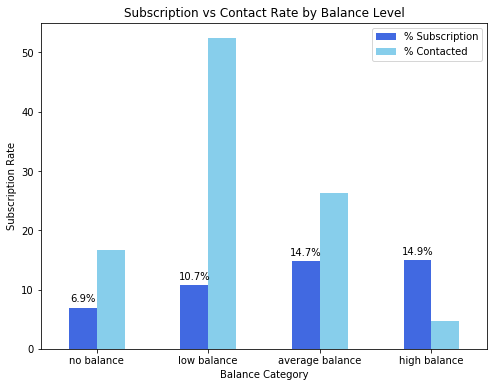

In [29]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [30]:
age_balance1 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

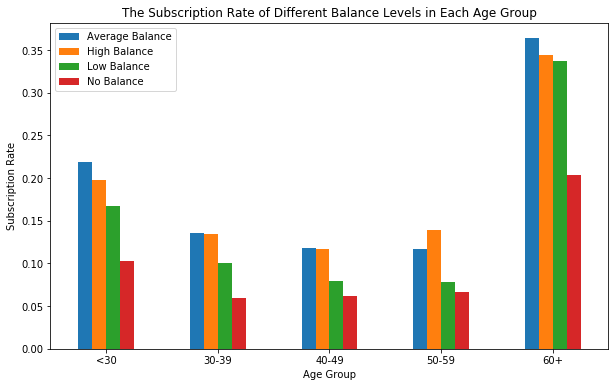

In [31]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

In [32]:
count_job_response_pct = pd.crosstab(dataset7['response'],dataset7['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

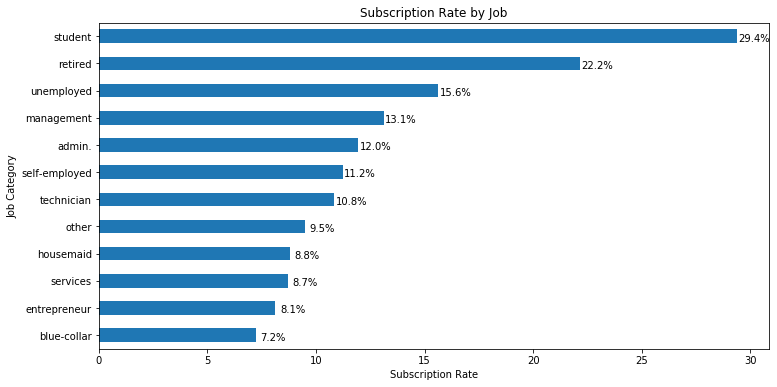

In [33]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [34]:
count_month_response_pct = pd.crosstab(dataset7['response'],dataset7['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [35]:
month = pd.DataFrame(dataset7['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

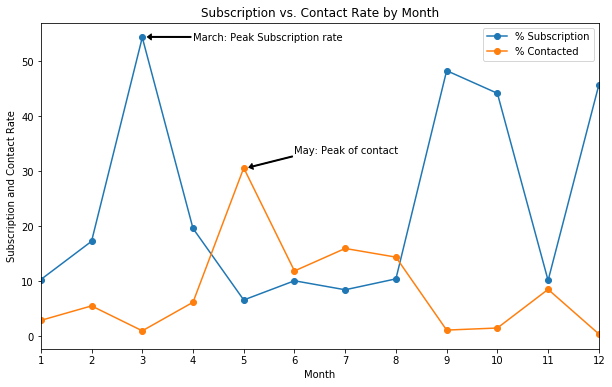

In [36]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [37]:
notebook_path = os.path.abspath("main.ipynb")
file_name=notebook_path.split('Code')[0]
data_path = os.path.join(file_name, "data\\bank\\bank_cleaned.csv")

dataset = read_csv(data_path)
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [38]:
# View the first 5 rows of cleaned data
dataset.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [39]:
dataset.drop(['marital'],axis=1, inplace=True)
dataset1 = dataset.iloc[:, 0:7]

In [40]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)

In [41]:
array = dataset2.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [43]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image  

In [54]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN2', KNeighborsClassifier(n_neighbors=7)))
models.append(('CART2', DecisionTreeClassifier(criterion="entropy")))
models.append(('CART3', DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)))
models.append(('CART4', DecisionTreeClassifier(max_depth=7)))
models.append(('MLP', MLPClassifier(random_state=1, max_iter=300)))
models.append(('MLP2', MLPClassifier( activation='logistic',hidden_layer_sizes= (150,2), solver='sgd', random_state=1, max_iter=300)))


In [55]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
   

LR: 0.885284 (0.005933)
KNN: 0.874938 (0.004055)
CART: 0.832915 (0.007340)
NB: 0.823855 (0.005429)
KNN2: 0.880386 (0.005145)
CART2: 0.832884 (0.006152)
CART3: 0.885284 (0.005890)
CART4: 0.884090 (0.005181)
MLP: 0.880356 (0.013991)
MLP2: 0.885284 (0.005890)


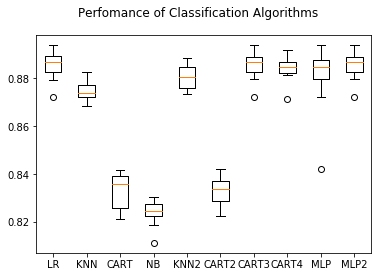

In [56]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [48]:
##knn için defaultta 5 vardı denedik; yüksek bir accuracy çıktı. daha sonra 5 ten 10 a kadar denedik. 
#accuracy değişmediği için farklı bir seçim metoduna gitmedik.

In [49]:
ds3 = dataset2
ds3.drop(ds3.columns[len(ds3.columns)-1], axis=1, inplace=True)
feature_cols = ds3.columns

In [50]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [51]:
#max_depth = 7
dot_data = StringIO()

export_graphviz(DecisionTreeClassifier(max_depth=7).fit(X_train,Y_train)
                    , out_file=dot_data,proportion=True, filled=True, rounded=True, special_characters=True
                    , feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_Telemarketing_dept7.png')

Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
#unlimited depth
dot_data = StringIO()

export_graphviz(DecisionTreeClassifier().fit(X_train,Y_train)
                    , out_file=dot_data,proportion=True, filled=True, rounded=True, special_characters=True
                    , feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_Telemarketing_unlimited_depth.png')

Image(graph.create_png())

In [ ]:
#Decision Tree detay
#cv_results
#X=X_train
#y=Y_train

den= DecisionTreeClassifier(max_depth = 7).fit(X_train, Y_train)

#den=den.fit(X_train, Y_train)

#print(tree.plot_tree(den))

y_pred=den.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


In [ ]:
#Decision Tree 3 models.append(('CART3', DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)))

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
den= DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
den=den.fit(X_train, Y_train)

#print(tree.plot_tree(den))

y_pred=den.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [ ]:
dot_data = StringIO()

export_graphviz(DecisionTreeClassifier(max_leaf_nodes=3, random_state=0).fit(X,y), out_file=dot_data,proportion=True, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Tree_Final.png')

Image(graph.create_png())

In [52]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
predictions = clf.predict(X_train)
# Accuracy Score 
print(accuracy_score(Y_train, predictions))


predictionstest = clf.predict(X_test)
# Accuracy Score 
print(accuracy_score(Y_test, predictionstest))
 #clf.score(X_test, y_test)


0.8853452497551421
0.8910515362957523


In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( activation='logistic',hidden_layer_sizes= (150,2), solver='sgd', random_state=1, max_iter=300).fit(X_train, Y_train)
predictions = clf.predict(X_train)
# Accuracy Score 
print(accuracy_score(Y_train, predictions))


predictionstest = clf.predict(X_test)
# Accuracy Score 
print(accuracy_score(Y_test, predictionstest))
 #clf.score(X_test, y_test)


0.8852840352595495
0.8909291222915902


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
 # Don't cheat - fit only on training data
scaler.fit(X_train)  
SX_train = scaler.transform(X_train)  
# apply same transformation to test data
SX_test = scaler.transform(X_test) 
clf = MLPClassifier(random_state=1, max_iter=300).fit(SX_train, Y_train)
predictions = clf.predict(SX_train)
# Accuracy Score 
print(accuracy_score(Y_train, predictions))


predictionstest = clf.predict(SX_test)
# Accuracy Score 
print(accuracy_score(Y_test, predictionstest))
 #clf.score(X_test, y_test)


In [ ]:
##test model with test SET for LR!
predictions = LR.predict(X_test)
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
#KNN modeli de train ettikten sonra test datasıyla predict etsin ve accuracy hesaplasın
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
kn= KNeighborsClassifier(n_neighbors=7)
kn=kn.fit(X_train, Y_train)

#print(tree.plot_tree(den))

y_pred=kn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

In [ ]:
dataset4 = dataset2.drop(['response_binary'],axis = 1)
dataset4['duration'] = dataset['duration']

In [ ]:
array = dataset4.values
X = array[:,0:20]
Y = array[:,20]

In [ ]:
test_size= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [ ]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [ ]:
results_e2_normalized = []
names_e2_normalized = []

for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2_normalized.append(cv_results)
    names_e2_normalized.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2_normalized)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2_normalized)
plt.show()

In [ ]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
predicted_y = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(Y_test, predicted_y))